### **Import Libraries**

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### **Function to extract HOG feature**

In [2]:
IMG_SIZE=(64,64)
CATEGORIES=['cats', 'dogs', 'snakes']
BASE_FOLDER=r'D:\SEM 8\Computer Vision\Animals'

In [3]:
# **Function to extract HOG features
def extract_hog_feature(image):
    image=cv2.resize(image,IMG_SIZE) # resize image
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) # convert RGB to grayscale

    features = hog(gray, orientations=9, pixels_per_cell=(8,8), cells_per_block=(2, 2),block_norm='L2-Hys', visualize=False)

    return features.flatten()

# Normalization improves the robustness of HOG features against
# Lighting and contrast changes in color
# block_norm='L2-Hys': contrast limiting by hysteresis threshold 

In [4]:
# Functions to load images and extract HOG features

def load_images():
   x,y=[],[]
   for label, category in enumerate (CATEGORIES):
      folder_path=os.path.join(BASE_FOLDER,category)

      for file in os.listdir(folder_path):
         img_path=os.path.join(folder_path,file)
         image=cv2.imread(img_path)

         if image is not None:
               x.append(extract_hog_feature(image))
               y.append(label)
      return np.array(x),np.array(y)

### **Load the Dataset**

In [5]:
x,y=load_images()

### **Split the dataset (80% train 20% test)**

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### **Train Naive Bayes Classifier**

In [7]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

### **Evaluate Model**

In [8]:
y_pred=model.predict(x_test)
print(f'Accuracy:{accuracy_score(y_test,y_pred):.2f}')

Accuracy:1.00


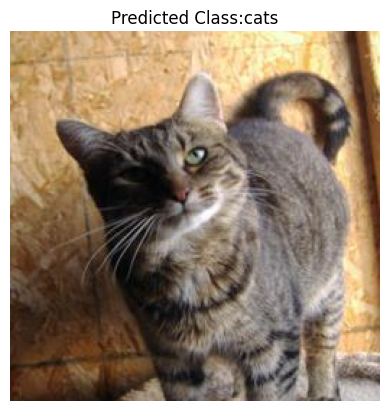

In [23]:
# Function to predict new image

def predict_image(image_path):
    image=cv2.imread(image_path)
    if image is None:
        print('Error loading the image')
        return
    img_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

    features=extract_hog_feature(image).reshape(1,-1)
    predicted_label=model.predict(features)[0]

   #  Display image
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Predicted Class:{CATEGORIES[predicted_label]}")
    plt.show()

# Example
image_path =r'D:\SEM 8\Computer Vision\Animals\cats\0_0999.jpg'
predict_image(image_path)

